# Projeto de Eletromagnetismo e Ondulatória - WPT

## ETAPA 1 - Simulações numéricas

#### 1. Elaboração do diagrama do modelo eletrodinâmico do circuito WPT

Na primeira parte do projeto iremos modelar um circuito WPT, usando como base o modelo do transformador podemos alterá-lo para se tornar um modelo eletrodinâmico de um WPT.

As modificações que foram feitas foram colocar um capacitor(C1) em série com a bobina primaria e colocar outro capacitor(C2) do mesmo valor em paralelo com a bobina secundaria e o resistor.

Com isso as posições do resistor(R1) e do indutor(L1) foram mantidas assim como no secundário em que o resistor (R2) e o capacitor(L2) foram mantidos, por conta que eles fazem parte da demonstração da bobina no modelo elétrico. 

Mais uma coisa importante de se dizer é que para fazer o teste primário consideramos que o valor de  L1 e L2 eram iguais e que os resistores R1 e R2 também eram idênticos, assim sendo duas bobinas idênticas.

Mostraremos o esquema deste circuito a seguir:


<img src="img/circuitoWPT.png" width="1000" />  

Aplicando a lei das tensões de Kirchhoff, temos que:

$$\hat{V} = R_1 \hat{I_1} + \frac{1}{\omega C_1}j\hat{I_1} + j \omega L_1 \hat{I_1} - j \omega M \hat{I_2}$$
$$j \omega M \hat{I_1} = j \omega L_2 \hat{I_2} + R_2 \hat{I_2} + \frac{R3 j}{1j + \omega C_2 R3} \hat{I_2}$$
  
Onde $R3$ é a carga resistiva do circuito receptora, e $\hat{V}$ é a tensão de entrada no circuito transmissor.

Agora, podemos escrever o modelo eletrodinâmico do circuito WPT como:

$$\begin{bmatrix}R_1 + \frac{1}{\omega C_1}j + j \omega L_1 & - j \omega M \\- j \omega M & j \omega L_2  + R_2  + \frac{R3 j}{1j + \omega C_2 R3} \end{bmatrix} \cdot \begin{bmatrix}\hat{I_1} \\ \hat{I_2} \end{bmatrix} = \begin{bmatrix}\hat{V} \\ 0 \end{bmatrix}$$


#### 2. Código do modelo numérico

Importanto bibliotecas

In [33]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np

Definindo os valores

Ufonte = É a tensão medida na fonte dado em Volts; <br/>
R1 = resistencia dos fios bobina 1; <br/>
R2 = resistencia dos fios da bobina 2;<br/>
L1 = Valor da indutancia da bobina 1;<br/>
L2 = Valor da indutancia da bobina 2;<br/>
C = Valor tanto do capacitor 1 quanto do capacitor 2;<br/>
K = fator de acoplamento;<br/>


<img src="img\Valoresbobinas1.jpeg" width="600" />  
<img src="img\Valoresbobinas2.jpeg" width="600" />  





In [34]:
Ufonte = 5
R1 = 1.884
R2 = 1.883
L1 = 650.9 * 10**(-6)
L2 = 614.7* 10**(-6)
C = 0.1 * 10**(-6)
K = 0.1

Foi feita uma função para o cálculo da matriz de impedância, que é a matriz que multiplica a matriz de corrente e tensão, para isso foi usado a biblioteca numpy para fazer os cálculos matriciais. Essa multiplicação gera uma matriz de 2x2, que é a matriz de impedância. Assim podendo obter os valores das correntes dos dois circuitos e também a tensão do circuito 2.

In [35]:
def calcula_transformador(Uf, Rc,Freq, R1, R2, L1, L2, C, K):
    C1 = C
    C2 = C
    XL1 = 1j * 2*pi*Freq*L1
    XL2 = 1j * 2*pi*Freq*L2
    XM = 1j * 2*pi*Freq * K * sqrt(L1*L2)
    XC1 = 1/(1j * 2*pi*Freq*C1)
    XC2 = 1/(1j * 2*pi*Freq*C2)
    Rpara = ((Rc*XC2)/ (Rc+XC2))  
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, R2+XL2+ Rpara ]]) #matriz de impedância
    V=np.array([Uf,0]) #matriz de tensão
    i=np.dot(linalg.inv(Z),V) #matriz de corrente

    v2 = i[1] * Rpara
    return i[0], i[1], v2

Após isso foi feito mostrado e feito os cálculos das correntes e tensões dos circuitos e a ralação de número de voltas, a relação de correntes e de tensões. Neste caso a tensão do circuito 2 está extremamente alta por conta que o circuito está em aberto

para fazer a relação de N1 por N2 foi calculado da seguinte forma


$$ \frac{N1}{N2} = \sqrt{\frac{L1}{L2}}$$

Para fazer a relação de correntes foi calculado da seguinte forma

$$ \frac{I1}{I2} = \frac{I1}{I2}$$

Para fazer a relação de tensões foi calculado da seguinte forma 

$$ \frac{V1}{V2} = \frac {Ufonte} {I2 . Rcarga}$$

In [36]:
Rcarga = 1000
i1, i2, v2 = calcula_transformador(Ufonte, Rcarga,60, R1, R2, L1, L2, C, K)

print('Com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))




Com resistor na saída de 1000.00 Ω:
i1 (eficaz) = 0.00 A
i2 (eficaz) = 0.00 A
V1 (eficaz): 5.00 V
V2 (eficaz): 0.00 V
Relação N1/N2: 1.03
Relação i2/i1: 0.00
Relação V1/V2: 1113652.89


#### 3. Construção de gráficos de I1 e I2 em função da frequência

Essa atividade consiste em fazer um gráfico dos módulos das correntes $𝑰̂_1$ e $𝑰̂_2$ em função da frequência da fonte, para um 𝑘 (coeficiente de
acoplamento) qualquer inicialmente fixo

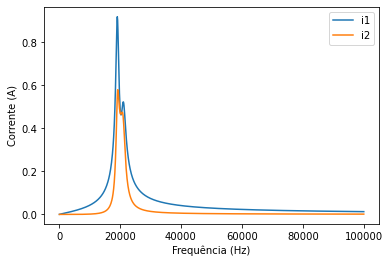

In [37]:
freq = np.linspace(100,100000,1000)
i1 = []
i2 = []
for f in freq:
    i_1  = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L1, L2,C,K)[0]
    i_2  = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L1, L2,C,K)[1]
    i1.append(abs(i_1))
    i2.append(abs(i_2))

import matplotlib.pyplot as plt
plt.plot(freq,i1)
plt.plot(freq,i2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Corrente (A)')
plt.legend(['i1','i2'])
plt.show()


#### Encontrando frequência do pico de corrente

In [38]:
corrente_max = max(i2)
print('Corrente máxima: %.2f A' %corrente_max)
index_max = i2.index(corrente_max)
freq_max = freq[index_max]
print('Frequência de ressonância: %.2f Hz' %freq_max)

Corrente máxima: 0.58 A
Frequência de ressonância: 19300.00 Hz


A frequência para a qual as correntes são máximas é coincidente com a frequência de ressonância que foi obtida na atividade 1.

k = fator de acoplamento (constante) = medida da quantidade de acoplamento entre duas bobinas ou indutores em um circuito

Indica a eficiência com que a energia magnética é transferida de uma bobina para outra. Varia entre 0 e 1.

Um fator de acoplamento de 1 indica um acoplamento perfeito, onde toda a energia magnética gerada por uma bobina é transferida para a outra bobina. Um fator de acoplamento de 0 indica um acoplamento nulo, onde não há transferência de energia entre as bobinas.

O fator de acoplamento pode ser calculado usando a fórmula:

k = M / √(L1 * L2)

A indutância mútua (M) é uma medida da interação magnética entre as bobinas e depende da geometria e posicionamento das bobinas no circuito. Quanto maior a indutância mútua, maior será o acoplamento entre as bobinas e, portanto, maior será o fator de acoplamento. A medida em que k varia, a amplitude do gráfico muda. 

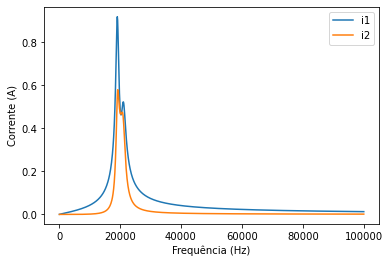

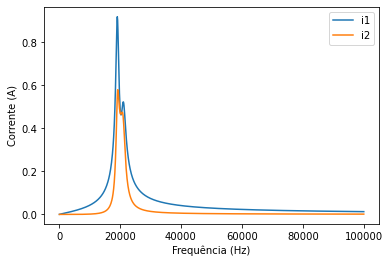

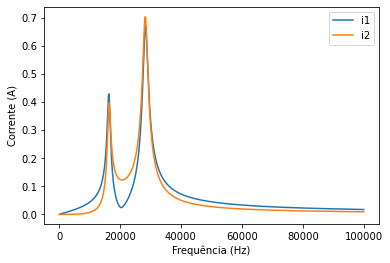

In [39]:
lista_de_k = np.linspace(0.1,0.9,3)

for k in lista_de_k:
    i1 = []
    i2 = []
    for f in freq:
        i_1  = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L1, L2,C,K)[0]
        i_2  = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L1, L2,C,K)[1]
        i1.append(abs(i_1))
        i2.append(abs(i_2))
    K = k
    plt.plot(freq,i1)
    plt.plot(freq,i2)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Corrente (A)')
    plt.legend(['i1','i2'])
    plt.show()


#### 4. Construção de um gráfico do módulo da tensão V2 pela frequência de ressonância, para 6 diferentes indutâncias:

Para a construção deste grafico fizemos uma lista de indutancias e uma lista de frequencias, após isso foi calculado o valor de cada capacitancia para cada frequencia e indutancia, através da formula:

$$ C = \frac{1}{4 . Pi . 2 . f^2 . L}$$

Após é calculado através da função calcula_transformador a corrente I1, I2 e a tensão V2, e com isso é calculado o modulo da tensão V2, e é adicionado a lista de tensões V2, e com isso é feito o gráfico de V2 por frequencia.


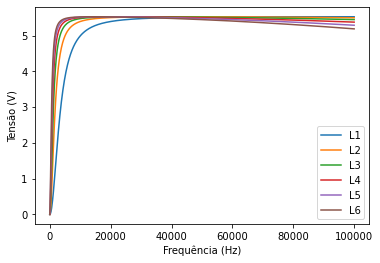

In [40]:
Rc = 300 # 300 Ohms
indutancias = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006] # Valores de indutância em H
frequencias = np.linspace(10, 100000, 1000) # Valores de frequencia em Hz (devia ser 6)

for L in indutancias:
    V2=[]
    for f in frequencias:
        C = 1/(4*(pi**2)*(f**2)*(L)) # TODO: Como adaptar isso?
        i1, i2, v2 = calcula_transformador(Ufonte, Rcarga,f,R1,R2,L, L ,C,K)
        V2.append(abs(v2))
    plt.plot(frequencias, V2)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Tensão (V)')
    plt.legend(['L1','L2','L3','L4','L5','L6'])
plt.show()


#### 5. Construção de gráficos das potências e da eficiência em função da frequência

Para construção deste gráfico foi feito uma lista de frequências entre 10kHz e 50kHz, e para cada frequência foi calculado a potência através da formula: 

$$ P = \frac {V2} {\frac {\sqrt{2} . I1} {\sqrt{2}} } $$

Após isso foi calculado o $\omega$ (velocidade angular) através da formula:

$$ \omega = 2 . Pi . f $$

Com isso foi possivel calcular a impedancia do circuito através da formula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

Após foi calculado o valor da tensão V de carga através da formula:

$$ Vc = I2 . Z $$

Ao fim disso foi calculado a potência de carga através da formula:

$$ P = \frac {Vc} {\frac {\sqrt{2} . I2} {\sqrt{2}} } $$

Assim fazendo o plot do grafico de potência de carga por frequência e o grafico de frequência por potencia de carga, e com isso foi calculado a potencia Máxima atingida

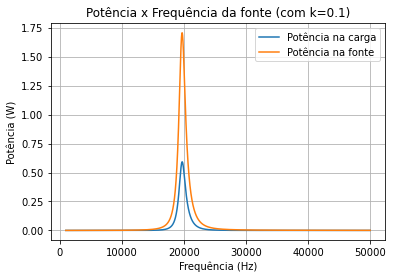

Potência máxima para k=0.1:  0.5922648691650932


In [51]:
lista_iRC = []
lista_eficiencia = []
lista_potencia_carga = []
lista_potencia_fonte = []

lista_freq = np.linspace(1e3, 50000, 100000)


#Calculando potência e eficiência em função da frequência.
for f in lista_freq:
    i1, i2,v = calcula_transformador(Ufonte, Rc,f,R1, R2, L1, L2, C, 0.1) 
    w = 2*pi*f
    Pot = (5/sqrt(2)*i1.conjugate()/sqrt(2))
    lista_potencia_fonte.append(Pot.real)

    Z_eq_carga = ((1/(1j*w*C))*Rc)/((1/(1j*w*C))+Rc) #
    V_carga = i2*Z_eq_carga
    I_Rc = V_carga/Rc
    Pot_carga = (V_carga/sqrt(2)*I_Rc.conjugate()/sqrt(2))

    #Adiciona os resultados na lista
    lista_potencia_carga.append(Pot_carga.real)
    lista_eficiencia.append(Pot_carga.real/Pot.real)

#Plotando a eficiência em função da frequência
plt.plot(lista_freq, lista_potencia_carga, label="Potência na carga")
plt.plot(lista_freq, lista_potencia_fonte, label="Potência na fonte")
plt.title("Potência x Frequência da fonte (com k=0.1)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência (W)")
#plt.ylim(0, 50)
#plt.xlim(50000, 51000)
plt.legend()
plt.grid(True)
plt.show()

# Cálculo da potência máxima para o k=0.1
print("Potência máxima para k=0.1: ", float(max(lista_potencia_carga)))

Após isso com os mesmos valores calculados no intem anterior foi feito um gráfio de eficiência por frequência, e com isso foi calculado a eficiência máxima atingida.

No handles with labels found to put in legend.


20309.623096230964


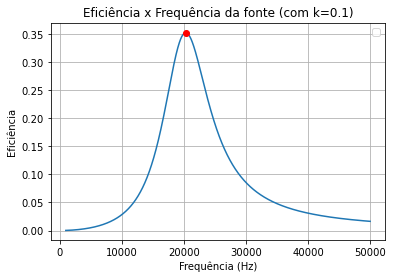

In [52]:
plt.plot(lista_freq, lista_eficiencia)
# print(lista_eficiencia)
i = lista_eficiencia.index(max(lista_eficiencia))
print(lista_freq[i])
plt.plot(lista_freq[i], lista_eficiencia[i], 'ro')
plt.title("Eficiência x Frequência da fonte (com k=0.1)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Eficiência")
plt.legend()
plt.grid(True)
plt.show()

#### 6. Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶 ) com o coeficiente de acoplamento 𝑘

Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) com
o coeficiente de acoplamento 𝑘: para essa atividade, use a frequência de ressonância natural do
conjunto 𝐿𝐶, que ficará fixa para diferentes valores de 𝑘. A ideia, com a simulação, é identificar se existe
um fator de acoplamento ótimo, com o qual a tensão no secundário é máxima (e, por conseguinte, a
potência recebida também será máxima).

Para a construção deste gráfico foi feito uma lista de k's, e para cada k foi calculado a tensão Vcarga através da fórmula:

$$ Z = \frac {\frac{1}{j . \omega . C} . Rc} {Rc + \frac{1}{j . \omega . C} } $$

$$ Vc = I2 . Z $$

Após isso foi feito o plot do gráfico de tensão de carga por k, e com isso foi calculado o k que gera a maior tensão de carga. 

E também calculado o k ideal o V2 para o mesmo isso tudo na frequência de 2kHz

freq_r 20000
k 0.06354515050167224
v2 26.958708444885936


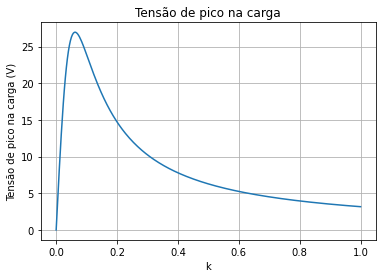

In [53]:

#freq_r = 1/(2*pi*sqrt(L*C))
freq_r = lista_freq[i]

freq_r = 20000
Ufonte = 5 * 2/pi
Rcarga = 1000
R1 = 1.884
R2 = 1.883
L1 = 650.9 * 10**(-6)
L2 = 614.7* 10**(-6) 
C = 0.1e-6
print('freq_r', freq_r)

lista_k = np.linspace(0, 1, 300)
lista_tensao_pico = []
for k_novo in lista_k:
    i1, i2, V2 = calcula_transformador(Ufonte,Rcarga,freq_r, R1, R2, L1, L2,C, k_novo)
    w = 2*pi*freq_r
    Z_eq_carga = ((1/(1j*w*C))*Rcarga)/((1/(1j*w*C))+Rcarga)
    V_carga = i2*Z_eq_carga
    lista_tensao_pico.append(abs(V_carga))

plt.plot(lista_k, lista_tensao_pico)
i_pico = lista_tensao_pico.index(max(lista_tensao_pico))
pico = lista_k[i_pico]
print('k', pico)
print('v2', lista_tensao_pico[i_pico])
plt.title("Tensão de pico na carga")
plt.xlabel("k")
plt.ylabel("Tensão de pico na carga (V)")
plt.grid(True)
plt.show()

# Conclusão

Para concluir ficamos curiosos sobre o que a distância influência através do k, fator de acoplamento, e com isso chegamos à conclusão de que quanto mais perto da distância em que ele tem uma maior tensão de carga, e com isso a potência de carga é maior, e com isso a eficiência é maior, e com isso a potência máxima é maior. Assim comprovando que quanto mais perto da frequência de ressonância, menor fica o K e quanto mais distante deste local em que entra em ressonância maior ficara o seu K.

In [57]:
# freq_r = 1/(2*pi*sqrt(L*C))
freq_r = lista_freq[i]

freq_r = 20000
Ufonte = 5 * 2/pi
Rcarga = 1000
R1 = 1.884
R2 = 1.883
L1 = 650.9 * 10**(-6)
L2 = 614.7 * 10**(-6)
C = 0.1e-6
print('freq_r', freq_r)

lista_k = np.linspace(0, 1, 1000)
lista_tensao_pico = []
for k_novo in lista_k:
    i1, i2, V2 = calcula_transformador(Ufonte, Rcarga, freq_r, R1, R2, L1, L2, C, k_novo)
    w = 2*pi*freq_r
    Z_eq_carga = ((1/(1j*w*C))*Rcarga)/((1/(1j*w*C))+Rcarga)
    V_carga = i2*Z_eq_carga
    lista_tensao_pico.append(abs(V_carga))




freq_r 20000

















[0.2502502502502503, 0.17417417417417416, 0.14614614614614616, 0.11611611611611611, 0.10510510510510511, 0.0980980980980981, 0.04604604604604605, 0.05305305305305305, 0.044044044044044044, 0.09509509509509509, 0.11611611611611611, 0.13813813813813813, 0.15915915915915915, 0.2032032032032032, 0.2802802802802803]


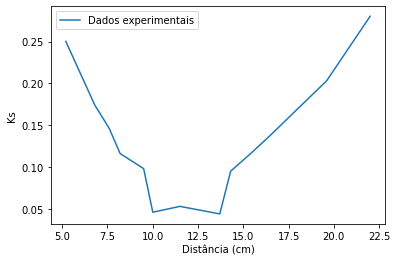

In [58]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Valores medidos no laboratório
distancia = np.array([5.2,6.8,7.6,8.2,9,9.5,10,11.5,13.7,14.3,15.4,16.5,17.5,19.6,22])
tensao = np.array([12.1,16.5,18.9,22.1,23.3,24.1,25.7,26.6,25.3,24.5,22.1,19.7,17.7,14.5,10.9])




ks = []

for i in range(len(distancia)):
    dist = distancia[i]
    tens = tensao[i]

    print()
    
    idx = (np.abs(lista_tensao_pico - tens)).argmin()
    ks.append(lista_k[idx])

print(ks)

plt.plot(distancia, ks, label='Dados experimentais')
plt.xlabel('Distância (cm)')
plt.ylabel('Ks')
plt.legend()
plt.show()
